# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-12 21:44:23--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-12 21:44:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [5]:

# Resumen del conjunto de datos
print("Información general del DataFrame:")
data.info()

print("\nEstadísticas descriptivas del DataFrame:")
display(data.describe(include='all'))

# Contar la cantidad de tweets por etiqueta
print("\nConteo de tweets por etiqueta:")
label_counts = data['Label'].value_counts()
display(label_counts)

print("\nProporción de tweets por etiqueta:")
display(label_counts / len(data))

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB

Estadísticas descriptivas del DataFrame:


,Contents,Label
count,1914,1914
unique,1914,2
top,"vamos @arvenlol, dales duro como tú sabes #lo...",non-biased
freq,1,1596



Conteo de tweets por etiqueta:


,count
Label,
non-biased,1596
biased,318



Proporción de tweets por etiqueta:


,count
Label,
non-biased,0.833856
biased,0.166144


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

En mi análisis encontré que el 16.6% de los tuits son “biased” y el 83.4% “non-biased”. Esto muestra un gran desequilibrio en los datos, lo que puede afectar el entrenamiento de modelos y la interpretación de resultados, ya que hay muchos más tuits sin sesgo que con sesgo.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [9]:
## Cree una funcion limpiar texto

In [10]:
import re
from nltk.corpus import stopwords

# Ensure stopwords are downloaded if not already
import nltk
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('spanish'))

def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Eliminar enlaces
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

In [11]:
import pandas as pd

# Assuming 'data' DataFrame already exists from previous steps
# If 'data' is not defined, please load your CSV first:
# data = pd.read_csv('Gender_bias_spanish.csv')

# Aplicar la limpieza de texto
data['cleaned_contents'] = data['Contents'].apply(clean_text)

# Display the first few rows with the new cleaned column to verify
display(data[['Contents', 'cleaned_contents']].head())

,Contents,cleaned_contents
0,@chumeltorres ya cabrón! sin tí se reciben las...,chumeltorres cabrón tí reciben noticias colcho...
1,¿alguien es tan amable de ir a hacerme la comp...,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",jenniferduquee hahaha si rico nadamas falta pr...
3,@evagelcot donde lo ves!!? es mi programa favo...,evagelcot ves programa favorito sólo encuentro...
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa mas platos playa


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

Top 10 palabras en tweets 'biased':


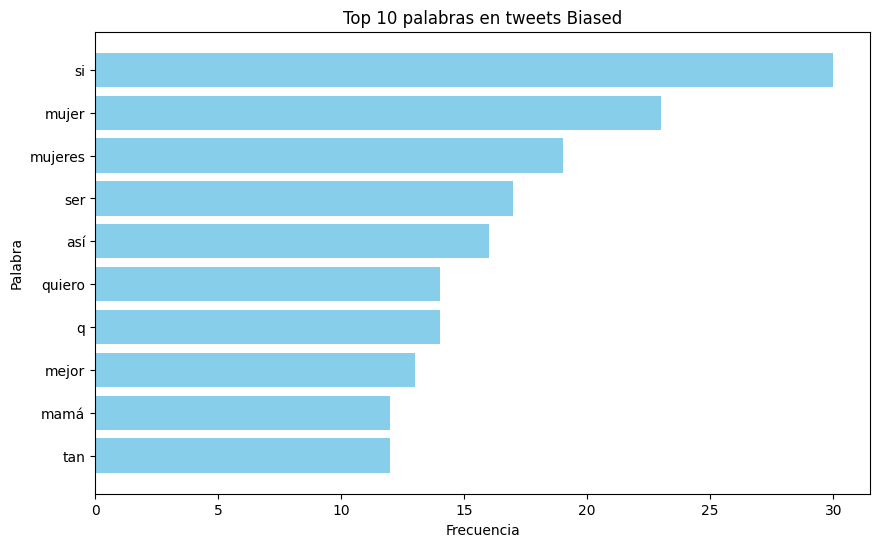


Top 10 palabras en tweets 'non-biased':


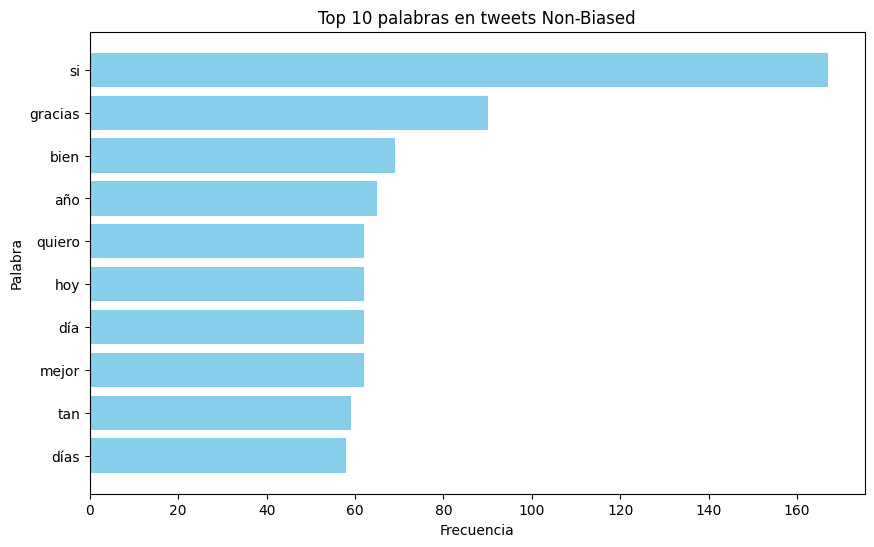

In [13]:
# Contar palabras
biased_tweets_text = ' '.join(data[data['Label'] == 'biased']['cleaned_contents'])
non_biased_tweets_text = ' '.join(data[data['Label'] == 'non-biased']['cleaned_contents'])

biased_word_freq = Counter(biased_tweets_text.split())
non_biased_word_freq = Counter(non_biased_tweets_text.split())

# Visualización de frecuencia de palabras
def plot_top_words(word_freq, title):
    most_common_words = word_freq.most_common(10)
    words = [word for word, count in most_common_words]
    counts = [count for word, count in most_common_words]

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.title(title)
    plt.gca().invert_yaxis() # Poner la palabra más frecuente arriba
    plt.show()

print("Top 10 palabras en tweets 'biased':")
plot_top_words(biased_word_freq, 'Top 10 palabras en tweets Biased')

print("\nTop 10 palabras en tweets 'non-biased':")
plot_top_words(non_biased_word_freq, 'Top 10 palabras en tweets Non-Biased')

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

En los tuits “biased” se repiten palabras como gordo, idiota, hombre, chica y mujer, que suelen usarse con tono negativo o estereotipado. En cambio, los “non-biased” contienen términos más neutros y comunes del día a día.

Estas palabras muestran sesgos, sobre todo de género o por apariencia física, ya que reflejan juicios o estereotipos hacia ciertos grupos.

Las empresas pueden usar esta información para detectar lenguaje inapropiado hacia su marca, mejorar la atención al cliente, ajustar campañas para evitar mensajes discriminatorios, promover la inclusión y fortalecer la moderación de contenido.


## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [18]:

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

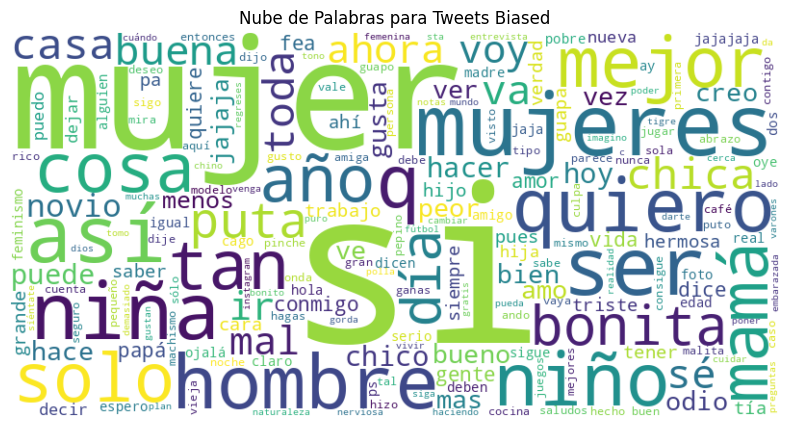

In [16]:
# Concatenar todos los tweets limpios para cada categoría
all_biased_words = ' '.join(data[data['Label'] == 'biased']['cleaned_contents'])

# Generar nube de palabras para tweets sesgados
generate_wordcloud(all_biased_words, 'Nube de Palabras para Tweets Biased')

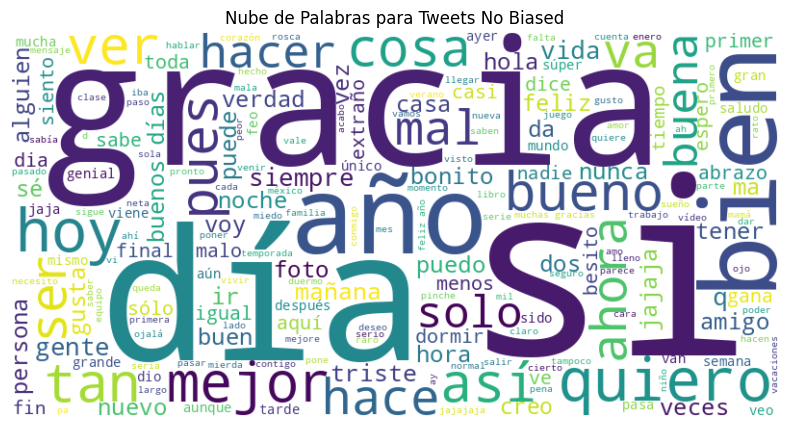

In [17]:
# Concatenar todos los tweets limpios para la categoría no sesgada
all_non_biased_words = ' '.join(data[data['Label'] == 'non-biased']['cleaned_contents'])

# Generar nube de palabras para tweets no sesgados
generate_wordcloud(all_non_biased_words, 'Nube de Palabras para Tweets No Biased')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?